<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/pymc3/AppleTreesKDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
# Example data for apple production of 10 trees
tree_data = [
    [10, 12, 8, 15, 13, 14],    # Tree 1
    [7, 9, 11, 13, 12, 10],     # Tree 2
    [15, 14, 12, 11, 10, 9],    # Tree 3
    [11, 13, 9, 10, 8, 12],     # Tree 4
    [13, 12, 14, 10, 9, 11],    # Tree 5
    [9, 11, 10, 12, 14, 13],    # Tree 6
    [12, 10, 11, 9, 13, 14],    # Tree 7
    [14, 13, 9, 12, 10, 11],    # Tree 8
    [8, 10, 12, 11, 13, 9],     # Tree 9
    [11, 12, 10, 9, 14, 13]     # Tree 10
]

In [3]:
# Calculate KDE functions for each tree
kde_functions = []
for data in tree_data:
    kde = gaussian_kde(data)
    kde_functions.append(kde)

In [4]:
# Assign equal weights to each KDE function
weights = np.ones(len(kde_functions)) / len(kde_functions)

In [7]:
# Combine the KDE functions using the weights
combined_kde = lambda x: np.sum(weight * kde_function(x) for weight, kde_function in zip(weights, kde_functions))
combined_kde_v2 = lambda x: np.sum([weight * kde_function(x) for weight, kde_function in zip(weights, kde_functions)])

In [6]:
# Example usage: Evaluate the combined KDE at a specific point
x = 11
density = combined_kde(x)
print(f"The combined KDE density at x={x} is: {density}")

The combined KDE density at x=11 is: [0.15289657]


<ipython-input-5-1bb29ac2fc95>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  combined_kde = lambda x: np.sum(weight * kde_function(x) for weight, kde_function in zip(weights, kde_functions))


In [8]:
# Example usage: Evaluate the combined KDE at a specific point
x = 11
density = combined_kde(x)
print(f"The combined KDE density at x={x} is: {density}")
density_v2 = combined_kde_v2(x)
print(f"The combined KDE density (version 2) at x={x} is: {density_v2}")

The combined KDE density at x=11 is: [0.15289657]
The combined KDE density (version 2) at x=11 is: 0.15289656606446667


<ipython-input-7-91db36d66613>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  combined_kde = lambda x: np.sum(weight * kde_function(x) for weight, kde_function in zip(weights, kde_functions))


In [9]:
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [12]:
np.ones(len(kde_functions))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
# Generate x values for the plot
x_vals = np.linspace(0, 20, 100)

In [14]:
# Evaluate the combined KDE function at x values
y_vals = [combined_kde(x) for x in x_vals]

<ipython-input-7-91db36d66613>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  combined_kde = lambda x: np.sum(weight * kde_function(x) for weight, kde_function in zip(weights, kde_functions))


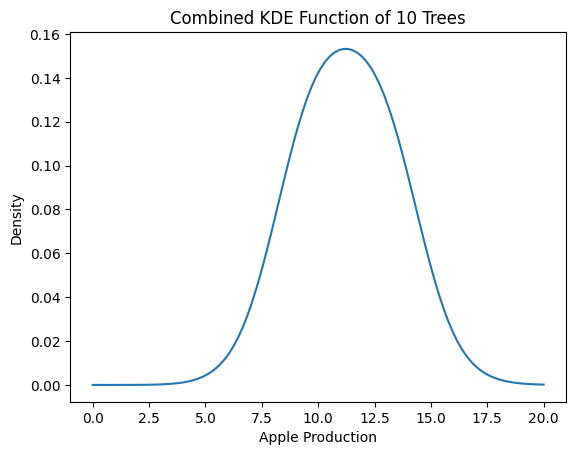

In [17]:
# Plot the combined KDE function
plt.plot(x_vals, y_vals)
plt.xlabel('Apple Production')
plt.ylabel('Density')
plt.title('Combined KDE Function of 10 Trees')
plt.show()